In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
from scipy import odr # for fitting
import sys
import datetime
import glob
import shutil
import subprocess

from csv import writer

import matplotlib as mpl

mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams["axes.labelsize"] = 20
mpl.rcParams["axes.titlesize"] = 20
mpl.rcParams["legend.fontsize"] = 20

mpl.rcParams['axes.linewidth'] = 2

fname="PR2.png"

In [124]:
# http://opencv.jp/opencv-2svn/cpp/drawing_functions.html

# cv2.ellipse(img, ((190, 105), (20, 50), 0), (255, 255, 255))
# cv2.ellipse(img, ((240, 105), (20, 50), 30), (0, 0, 0), thickness=-1)
# 引数boxは(center, axes, angle)で表し、centerは(x, y)、axesは(横方向直径, 縦方向直径)、回転角度angleはx軸方向を0度として時計回りに度で指定する。

507 644


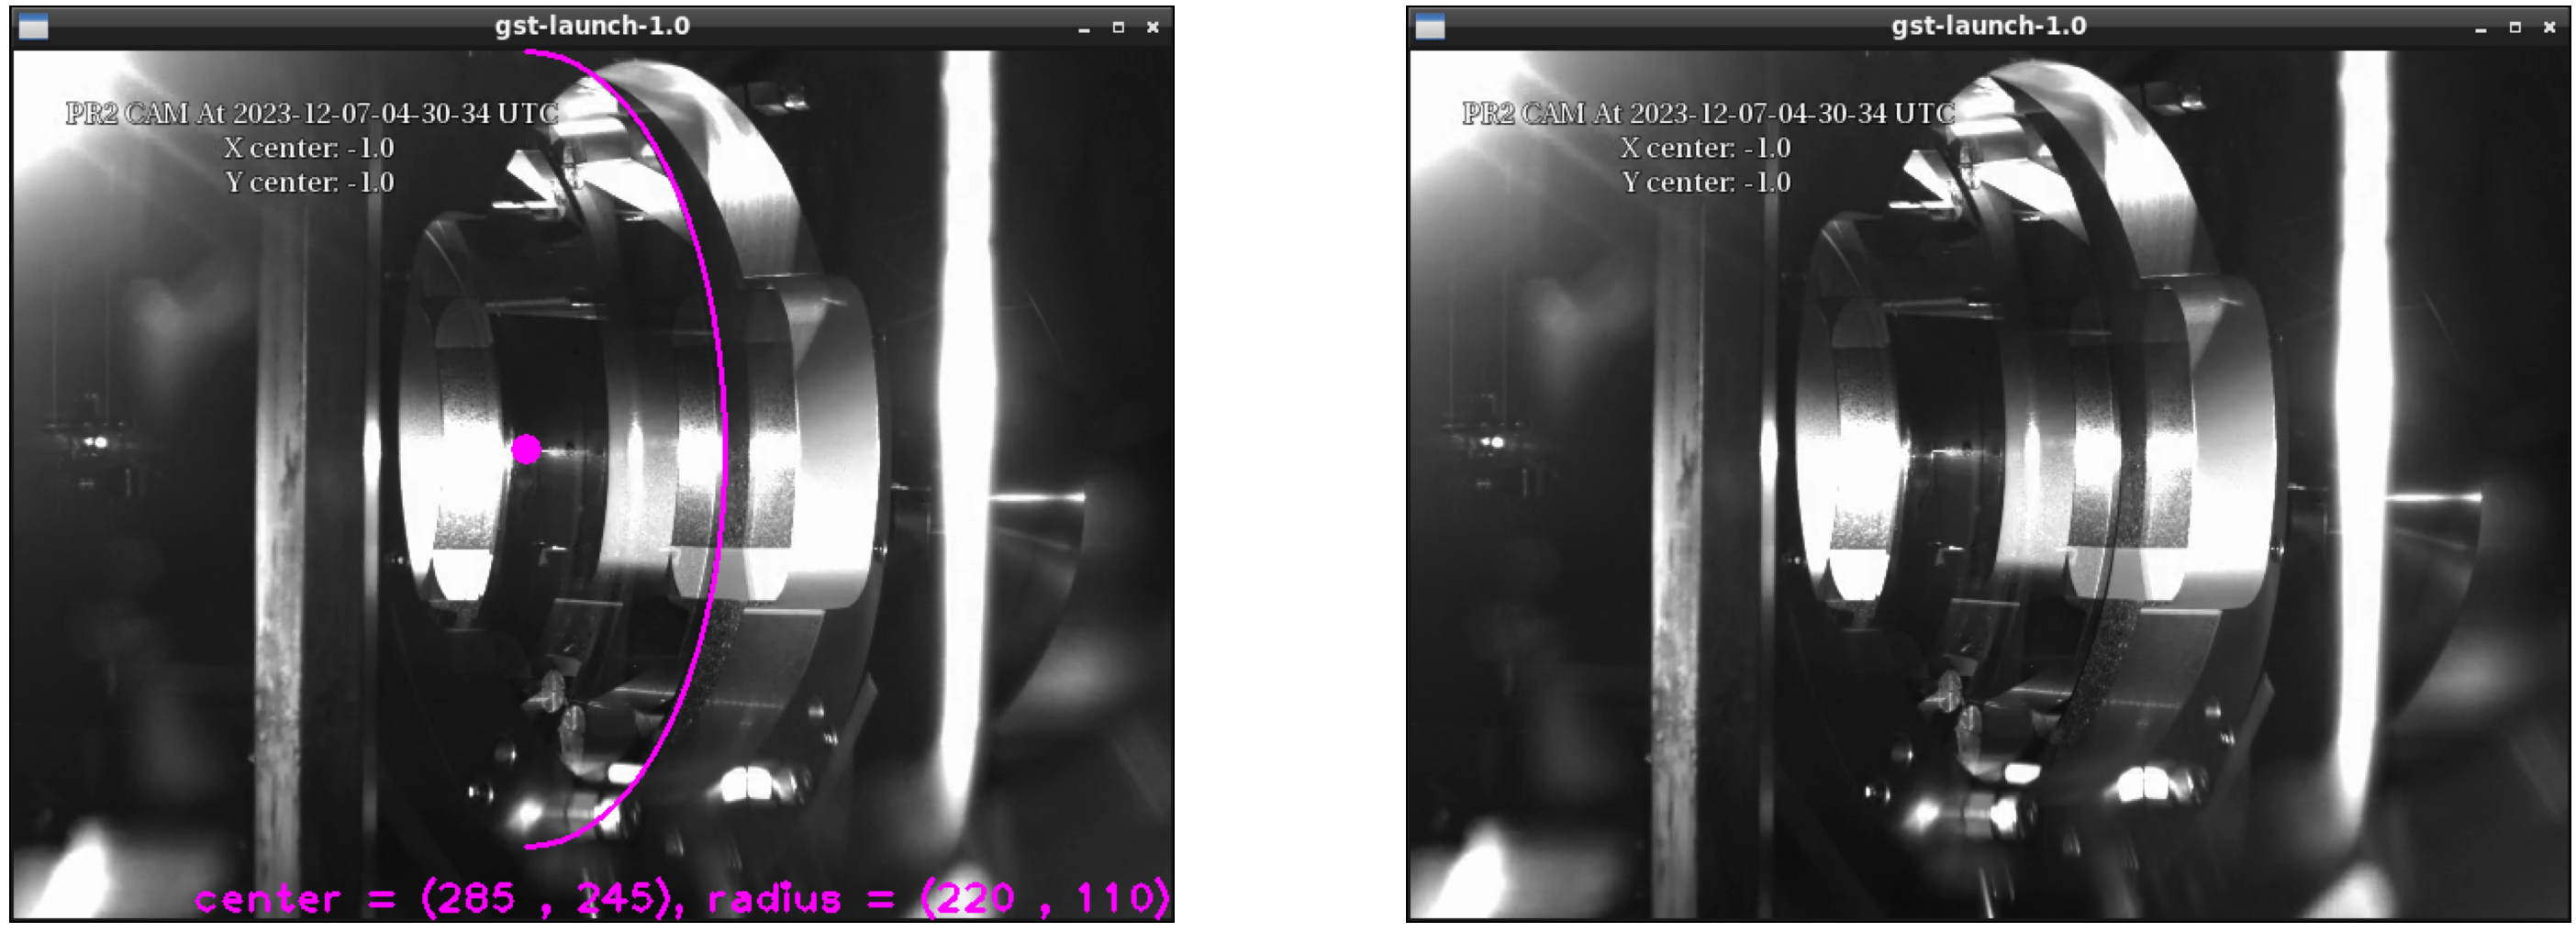

In [212]:
# Load an color image
img_orig = cv2.imread(fname, cv2.IMREAD_UNCHANGED)
img_orig = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)
img = img_orig.copy()
height, width, _ = img_orig.shape
print(height, width)

center=(285, 245)
axes=(220, 110)
angle=0
color=(255, 0, 255)

img = cv2.ellipse(img, center, axes, -90, 0, 180,
       color=color, # magenta
       thickness=2,
       lineType=cv2.LINE_8,
       shift=0)
img =cv2.circle(img,
       center=center,
       radius=8,
       color=color, # magenta
       thickness=-1,
       lineType=cv2.LINE_4,
       shift=0)
cv2.putText(img, 'center = (%d , %d), radius = (%d , %d)' % (center[0], center[1], axes[0], axes[1]),
        (100, int(height*0.99)), cv2.FONT_HERSHEY_PLAIN,
        fontScale=1.5,
        color=color, thickness=2)


fig = plt.figure(figsize = (50, 30))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis

plt.subplot(1, 2, 2)
plt.imshow(img_orig)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis

fig.savefig("PR2_1.png")
plt.show()


507 644


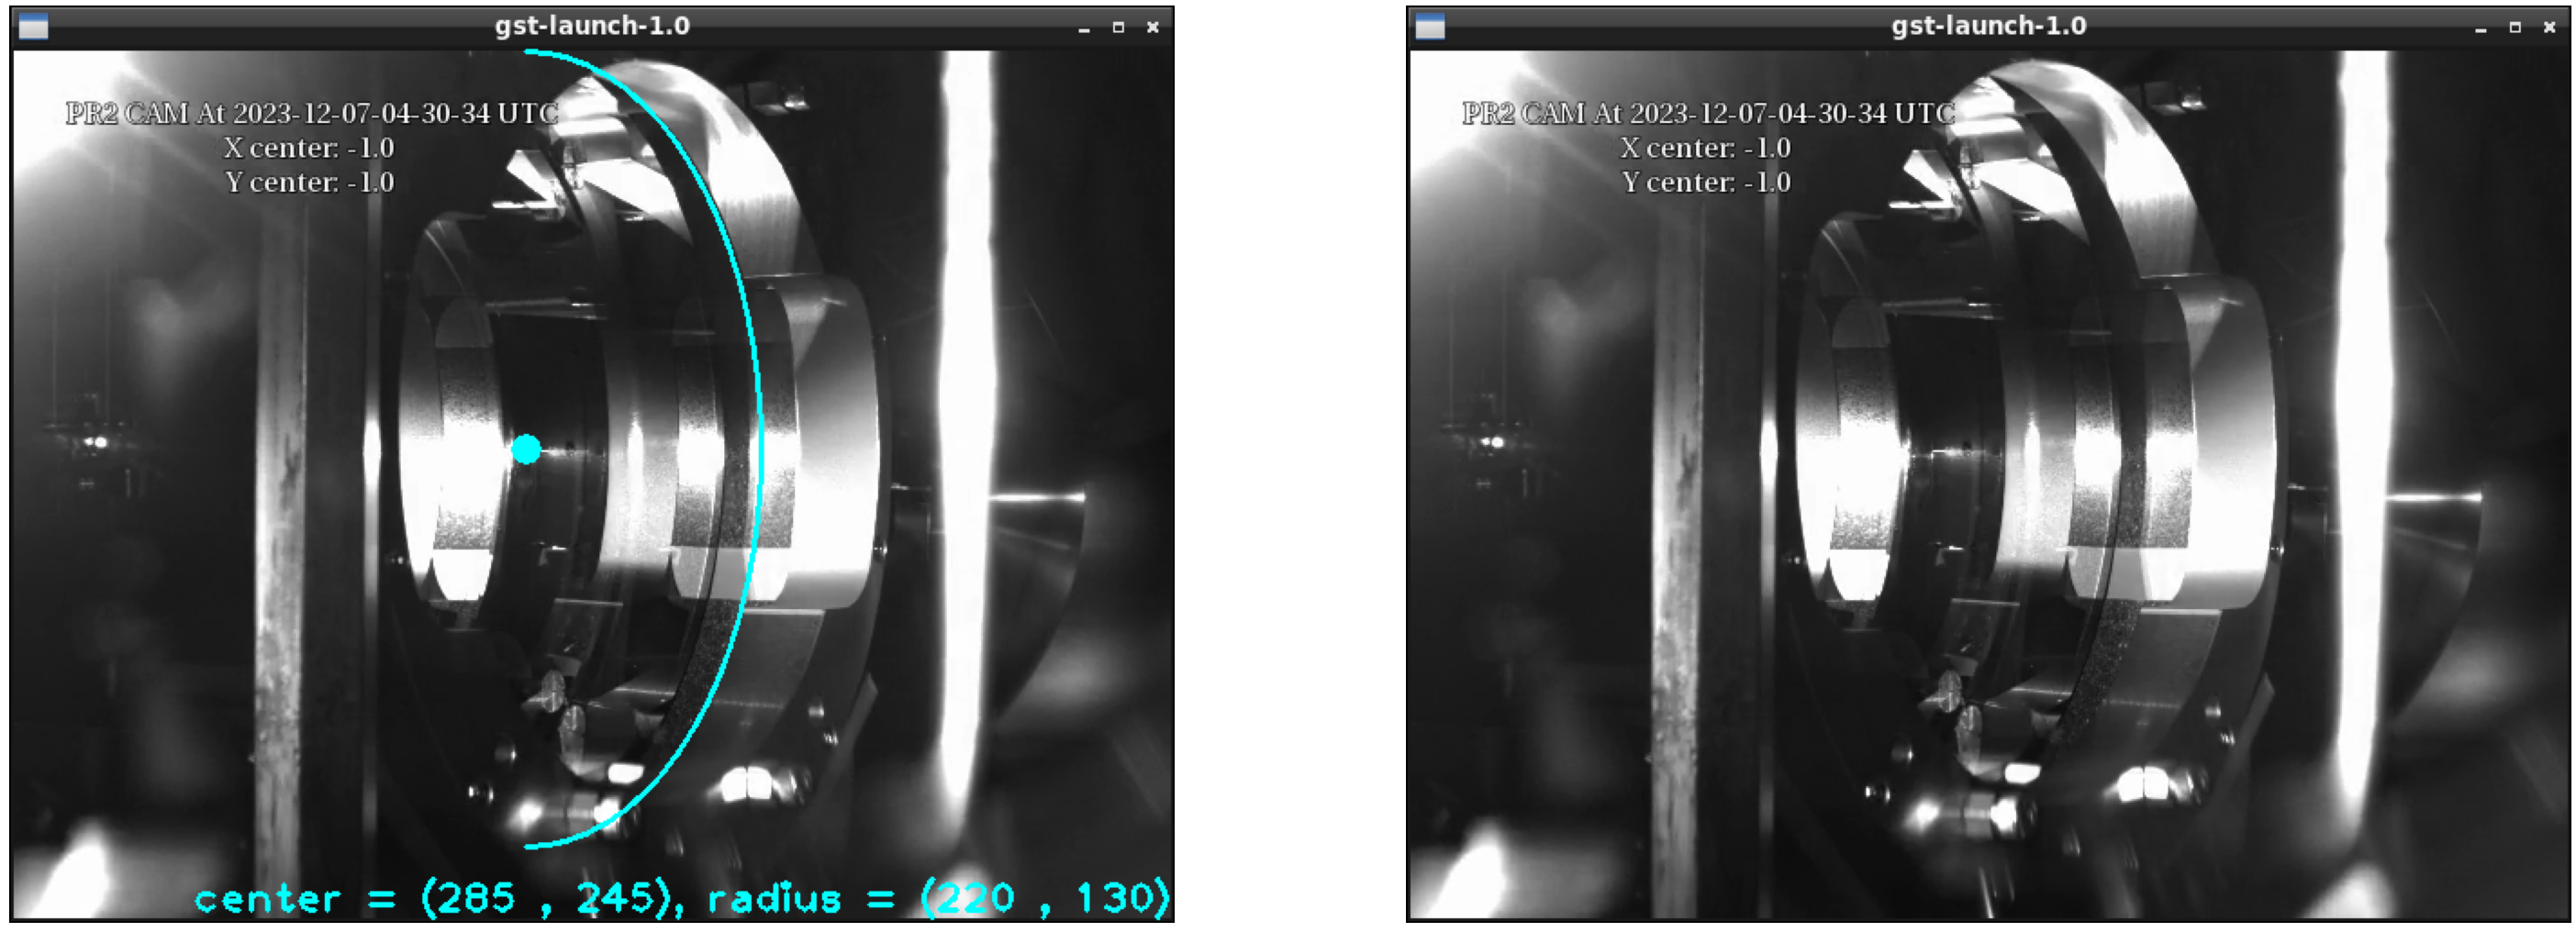

In [213]:
# Load an color image
img_orig = cv2.imread(fname, cv2.IMREAD_UNCHANGED)
img_orig = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)
img = img_orig.copy()
height, width, _ = img_orig.shape
print(height, width)

center=(285, 245)
axes=(220, 130)
angle=0
color=(0, 255, 255)

img = cv2.ellipse(img, center, axes, -90, 0, 180,
       color=color, # magenta
       thickness=2,
       lineType=cv2.LINE_8,
       shift=0)
img =cv2.circle(img,
       center=center,
       radius=8,
       color=color, # magenta
       thickness=-1,
       lineType=cv2.LINE_4,
       shift=0)
cv2.putText(img, 'center = (%d , %d), radius = (%d , %d)' % (center[0], center[1], axes[0], axes[1]),
        (100, int(height*0.99)), cv2.FONT_HERSHEY_PLAIN,
        fontScale=1.5,
        color=color, thickness=2)

fig = plt.figure(figsize = (50, 30))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis

plt.subplot(1, 2, 2)
plt.imshow(img_orig)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis

fig.savefig("PR2_2.png")
plt.show()



In [8]:
from sympy import *
from sympy.geometry import *
from sympy.abc import *

In [ ]:
x = Point(0, 0)
y = Point(1, 1)
z = Point(2, 2)
zp = 

In [22]:
def f(x):
    return x**2 + 3*x + 2

def f1(x, a, b, c):
    return a*x**2 + b*x + c

def ellipse(x, a, b, c, d, e):
    return a*x**2 + b*y** + c*x + d*y + e

In [17]:
sol=solve(f1(x, a=0, b=3, c=2), x)
print(sol)

[-2/3]


# やりたいこと
- 楕円の式は `a*x**2 + b*y** + c*x + d*y + e=0`のように書ける
- 座標(x, y)を5点、画像から求める
- これを代入して、そのときのa, b, c, d, eを求める
- それぞれが楕円のパラメーターのなっているはず

In [90]:
xy = [(0, 0) for _ in range(5)] # (0, 0)が5個あるリスト

In [91]:
def func(a, b, c, d, e, x):
    print(a, b, c, d, e, x)
    #sol=solve(a*x**2 + b*y**2 + c*x + d*y + e, y)
    sol=solve(1.0/c*(x-a)**2 + 1.0/d*(y-b)**2 + e, y)
    #print(sol)
    return sol

In [92]:
func(0, 0, 1, 1, -16, 1)

0 0 1 1 -16 1


[-3.87298334620742, 3.87298334620742]

In [107]:
a=0
b=0
c=1
d=1
e=-16
for i, x in enumerate([0, 1, 2, 3, 1.5]):
    sol = func(a, b, c, d, e, x)
    print(sol)
    xy[i] = [x, abs(sol[0])]

0 0 1 1 -16 0
[-4.00000000000000, 4.00000000000000]
0 0 1 1 -16 1
[-3.87298334620742, 3.87298334620742]
0 0 1 1 -16 2
[-3.46410161513775, 3.46410161513775]
0 0 1 1 -16 3
[-2.64575131106459, 2.64575131106459]
0 0 1 1 -16 1.5
[-3.70809924354783, 3.70809924354783]


In [108]:
xy

[[0, 4.00000000000000],
 [1, 3.87298334620742],
 [2, 3.46410161513775],
 [3, 2.64575131106459],
 [1.5, 3.70809924354783]]

In [109]:
x0 = sympy.Symbol('x0')
y0 = sympy.Symbol('y0')
r1 = sympy.Symbol('r1')
r2 = sympy.Symbol('r2')
cons = sympy.Symbol('cons')
#Long diameter, short diameter

In [110]:
[1.0/r1*(x-x0)**2 + 1.0/r2*(y-y0)**2 + cons for (x, y) in xy]

[cons + 16.0*(1 - 0.25*y0)**2/r2 + 1.0*x0**2/r1,
 cons + 15.0*(1 - 0.258198889747161*y0)**2/r2 + 1.0*(1 - x0)**2/r1,
 cons + 12.0*(1 - 0.288675134594813*y0)**2/r2 + 1.0*(2 - x0)**2/r1,
 cons + 7.0*(1 - 0.377964473009227*y0)**2/r2 + 1.0*(3 - x0)**2/r1,
 cons + 13.75*(1 - 0.269679944985297*y0)**2/r2 + 2.25*(1 - 0.666666666666667*x0)**2/r1]

In [111]:
sol=solve([1.0/r1*(x-x0)**2 + 1.0/r2*(y-y0)**2 + cons for (x, y) in xy], [x0, y0, r1, r2, cons])
print(sol)

[(0.0, 0.0, r2, r2, -16.0/r2)]


In [117]:
del a, b, c, d, e, x, y

In [123]:
init_printing()
var('x, y, a, b, c, d, e')
Sol4=solve (a*x**2 + b*y**2 + c*x + d*x + e, [a, b, c, d, e])
display(Sol4)

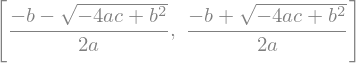

In [121]:
init_printing()
var('x, a, b, c')
Sol4=solve (a*x**2 + b*x + c, x)
display(Sol4)

In [26]:
a=1
b=1
c=1
sol=solve(a*x**2 + b*y**2 -1, x)
print(sol)

[(-sqrt(1 - y**2), y), (sqrt(1 - y**2), y)]


In [3]:
def compute_ellipse(data, figname=None, dataset=None, circles=None):
    """
    4点を通る楕円の中心と半径を取得
    https://detail.chiebukuro.yahoo.co.jp/qa/question_detail/q14117697559
    https://py3.hateblo.jp/entry/2014/02/23/172305
    """
    x1 = data[0]
    y1 = data[1]
    x2 = data[2]
    y2 = data[3]
    x3 = data[4]
    y3 = data[5]
    x4 = data[6]
    y4 = data[7]
    x5 = data[8]
    y5 = data[9]
    
    d = 2 * ((y1 - y3) * (x1 - x2) - (y1 - y2) * (x1 - x3))
    x = ((y1 - y3) * (y1 ** 2 - y2 ** 2 + x1 ** 2 - x2 ** 2) - (y1 - y2) * (y1 ** 2 - y3 ** 2 + x1 ** 2 - x3 ** 2)) / d
    y = ((x1 - x3) * (x1 ** 2 - x2 ** 2 + y1 ** 2 - y2 ** 2) - (x1 - x2) * (x1 ** 2 - x3 ** 2 + y1 ** 2 - y3 ** 2)) / -d
    r = math.sqrt((x - x1) ** 2 + (y - y1) ** 2)

    dt_now = datetime.datetime.now()
    print("fitted at %s" % dt_now)
    
    if figname != None:
        print("figname = %s" % figname)
    print("(x, y) = %.2f, %.2f, r = %.2f" % (x, y, r))

    if dataset != None:
        dataset.append(data)
    if circles != None:
        circles.append([x, y, r])

    #print(figname)
    if figname != None and os.path.isfile(figname):
        # Load an color image
        img_orig = cv2.imread(figname, cv2.IMREAD_UNCHANGED)
        #img_estimated = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)
        img_estimated = img_orig
        
        height, width, _ = img_orig.shape
        #     print("height = %d" % height)
        #     print("width = %d" % width)
        height2 = int(height/2)
        width2 = int(width/2)

        # center of circle
        center=(int(x), int(y))
        img_estimated =cv2.circle(img_estimated,
               center=center,
               radius=8,
               color=(255, 0, 255), # magenta
               thickness=-1,
               lineType=cv2.LINE_4,
               shift=0)
        # large circle
        img_estimated =cv2.circle(img_estimated,
               center=center,
               radius=int(r),
               color=(255, 0, 255), # magenta
               thickness=3,
               lineType=cv2.LINE_4,
               shift=0)

        cv2.putText(img_estimated, 'center = (%d , %d), radius = %d' % (x, y, r),
                (100, int(height*0.95)), cv2.FONT_HERSHEY_PLAIN,
                fontScale=4.0,
                color=(255, 0, 255), thickness=5)

        plt.figure(figsize = (12, 12))
        plt.imshow(img_estimated, cmap = 'gray', interpolation = 'bicubic')
        plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
        plt.show()

        # save fig as png
        fname="hoge.png"
        cv2.imwrite(fname, img_estimated)        
        plt.close('all') # windowを閉じないと、matplotlibが開きすぎとwarningを出すので        

        
    print("")
    return x, y, r